# Data Mining course
## Project 1
## Eyal Greenberg & Lindsay Vitovsky, January 2017

## -------------------------------------------------------------------------------------------------------

## I. Business understanding

For this project, our team analyzed a data set obtained from the UCI Machine Learning Repository, titled "Census Income Data Set".  This data set is a subset of the "1994 US Census Database", which we are deducing was pulled from 1990 census data given that 1990 was the latest year in whcih data was collected before this data subset was collected.  The download page for the subset touts 48,842 instances with fourteen attributes, however, when downloaded, the data set actually contained 32,561.  We continued with the data set since it still met the "medium-sized data set" requirement of at least 30,000.

Of course, census data is not as reliable as one would like for reasons expanded on in the "Data Unstanding" section of this paper.  We, nonetheless, chose this data set because it still hold some interesting implications.  At the time of this paper, the income disparity between the wealthiest US households and the rest of the population is becoming an increasingly contentious subject.  Could one uncover statistically significant results that showed certain socioeconomic groups belong to one income group or another (>=\$50K or <$50K)?  Could these results discover  systematic reasons for this disparity?  Does education only result in higher incomes if it points someone to a certain profession?

Census data might reveal more about what it does not reveal than what it does.  Many critical articles of the census we reviewed (included in our References) are based on the claim that the data might favor certain groups over others due to non-sampling.  While we are interested to see what we find out about the data, we acknowledge that we cannot infer more than what the integrity of the US Census allows.  

Overall, we are using this data set to:

*Introduce ourselves to Python 3 for Exploratory Data Analysis, becoming more familiar with the popular processes, tools, and APIs commonly used by the data science community.
    
*Distinguish, from the visualizations we are able to produce, which ones represent the various implications with the most clarity and meaning.
    
*Uncover meaningful inferences from the Census Income Dataset, including the additional questions we will undoubtedly be faced with.

## II. Data Understanding

### A. Description of the data

According to the data set [landing page](https://sourceforge.net/p/jupiter/wiki/markdown_syntax/#md_ex_links "UCI Machine Learning Census Income Data Set"), this data set was originally collected by Ronny Kohavi and Barry Becker of Silicon Graphics to predict whether a person "makes over 50K a year."  It is descbribed as a "reasonably clean data set", and was chosen from the larger census based on the following parameters: 
    
* **Age > 16**

* **Adjusted Gross Income (AGI) > \$100.**  This is to only include those earning at least $100.

* **Final Weight (fnlwgt) > 1.**  Kohavi and Becker used a series of controls to create a subset that resembled the weights of socioecononic status of the original data set.  "fnlwgt" is a weighted tally that describes the number of people that the observation represents, according to the Population Division at the Census Bureau. 

* **Hours Per Week (HRSWK) > 0.** This is to only include those who state that they work more than 0 hours per week.

#### Variables
Within the subset, the following variables were included:

* **age**: a continuous scale of an observation's age

* **workclass**: categorical(8); Private, Self-emp-not-inc (Self-employed, not incorporated), Self-emp-inc (Self-employed and incorporated), Federal-gov, Local-gov, State-gov, Without-pay, Never-worked

* **fnlwgt**: continuous scale (refer to description in preceding paragraph)

* **education**: categorical (16); Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool

* **education-num**: continuous scale of the # of education years completed

* **marital-status**: categorical (7); Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse

* **occupation**: categorical (14), representing the occupation of the instance / observation; Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces

* **relationship**: categorical (6), representing the relationship of the instance to the household; Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried

* **race**: categorical (5); White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black

* **sex**: categorical (2); Female, Male

* **capital-gain**: continuous; defines how much, if any, an instance had a capital gain (i.e. money leftover) after paying taxes.

* **capital-loss**: continuous; defines how much, if any, an instance lost (i.e. was "in the hole") after paying taxes.

* **hours-per-week**: continous; the average number of hours one works each week

* **native-country**: categorical; references one's country of birth.  Countries included in the subset are the United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

The US Census is a reflection of the US population at a particular moment in time given the collection techniques (<cite>"Behind Inaccuracies in the Census", The Leadership Conference</cite>).  Even if the data were highly reliable, one would want to review multiple censuses over time to view trends.  The US Census faces challenges such as:

* *Seasonality* - Does the season of the year (Spring 1994) matter? Seasonal workers might not have been available, school is in session, and even the weather may have played a role in various geographic areas that may have made it problematic to gather data.
    
* *Access* - Even access to mail can be problematic for some, especially lower income households, let alone a computer.  Lower income households are more likely to rent, as well as move more often (<cite>"High Mobility Among Low-Income Families Creates Setbakcs for Children," Center for Housing Policy, 2011</cite>).  This most certainly affects the chances that they will be included in a census.

* *Mistrust of the government* - This might be obvious, but not everyone trusts the government.  Given the experiences of a person or that person's community of friends and family, a household might not be included in the census becuase they decide to not participate.

These challenges will certainly qualify our findings as we progress through this project.

#### B. Verify data quality

According the UCI description, the original researchers attempted to create a "reasonably clean" data set.  We found this to be true to the extent that we used the data for our exploration of certain variables.  The dataset had already performed the following to the extracted data: 

* AGI was used to split income into two groups for the income classifer (>=\$50K or <$50K).  AGI seems reasonable to use for this, as gross income can be deceiving.  AGI assumes one's deductible expenses have been removed, and is closer to what one actually "lives on."

* "U.S" was changed to "US" to avoid periods

* "Unknowns" were changed to "?"

Firstly, we performed routine checks and statistical measures on all variables in the data set...

In [1]:
# Import the required packages and load the Census Income dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

header_names = ('age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry', 'income')
censusdata = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=',', header=None) # read in the csv file
censusdata.columns = header_names

censusdata.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Then, we checked our import to be sure the variables were read in correctly...

In [274]:
print (censusdata.dtypes)
print (censusdata.info())

age               int64
workclass        object
fnlwgt            int64
education        object
educationnum      int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
nativecountry    object
income           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age              32561 non-null int64
workclass        32561 non-null object
fnlwgt           32561 non-null int64
education        32561 non-null object
educationnum     32561 non-null int64
maritalstatus    32561 non-null object
occupation       32561 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capitalgain      32561 non-null int64
capitalloss      32561 non-null int64
hoursperweek     32561 non-null int64
nativecountry   

Here are the routine statistics to introduce us to the data:

In [273]:
censusdata.describe()

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Calling the describe() function gave us measures on the continuous variables.  From here we see that:

* There are 32,561 observations

* The mean age was 38.58 years, with a range that spanned 17-90 years (someone is still working at 90!)  38.58 years seems correct given that "working years" are more common for when someone is allowed to work (15 or 16, depending on the state) to in their 60s.  It would be interesting to explore the mean ages and ranges for the various education levels.

* The mean capital gain and capital loss numbers are slightly convoluted.  The lack of data in the quartile readings indicate a possible socio-economic implication (i.e. capital gains might be most common with the highest income earners), or it might just mean that the data was not collected.  

* The average work week lasts 40.4 hours, with a range of 1 - 99 hours.

#### C. Visualize appropriate statistics

Our first question was to know a breakdown of how many observations fell below or above the \$50K parameter.  

In [275]:
# percentage of people with income above 50k

above50k = float(len(censusdata[censusdata.income.str.contains('>50K')]))/len(censusdata) * 100
print(above50k)

24.080955744602438


The results of the data show that 24.09% of the observations earn more than \$50,000 per year.  Since actual AGIs were not included in the data set we are using, it is difficult to know more about any discrepancies between the first and fourth quartiles.  One could look at the capital gain data to see that all instances of capital gains fell in the top 25% of observations.  This might indicate a large disparity of wealth.  It seems that most observations (at least 75%) would have not experienced a capital gain.

Next, we looked at box plots to observe the distribution of the two income groups according to age as well as hours per week worked...

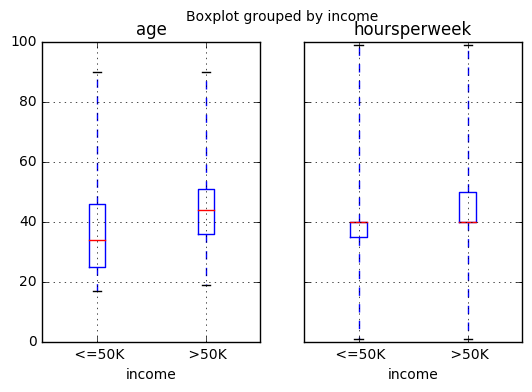

In [2]:
censusdata.boxplot(column=['age','hoursperweek'], by='income', whis='range')
plt.show()

On the left, we have side by side box plots, with the whishers set to the range.  When we consider age, one can see that the middle 50 percent of observations in the lower income group are generally younger than the higher income group.  The <$50K group also seems to be right skewed, not unlike the other group, but just more pronounced.  The whiskers seem to indicate for both groups that working past, say 60 or 70, is not as common, but that there are older individuals from both groups that seem to still be working.  It also appears that 90 might be the max age allowed in the data set, or it is just a coincidence that both income group have someone age 90 that is still working.

On the right we show the two income groups, showing hours worked per week.  Again, the whiskers are set to the range.  The middle 50% is more distributed for the >=\$50K group, indicating that the higher income group is less predictable on hours worked per week.  Approximately 75% of the lower income group work less than 40 hours per week, while 25% of the higher income group works less than 40 hours per week.  This could indicate more part time and/or hourly workers for the <$50K group.

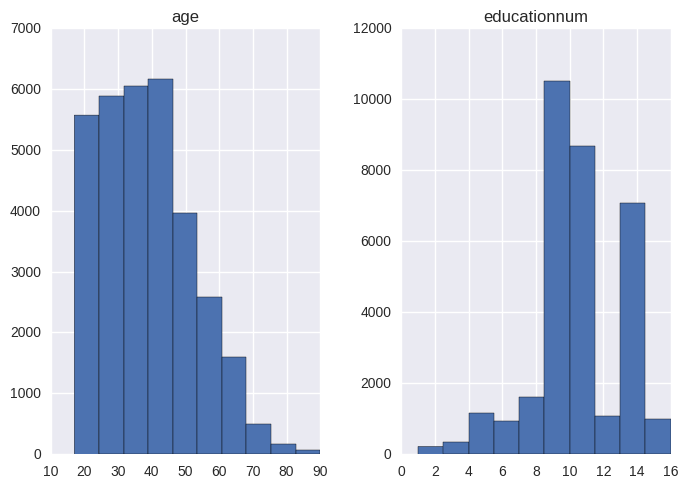

In [2]:
# histogram of age and educationnum
censusdata.hist(column=['age','educationnum'])

plt.show()

A correlation matrix, while perhaps early in the data analysis process, is interesting nonetheless.  We would want to dive in further to fully understand correlations with scatter plots, so the correlation matrix below simply serves as a way to reflect on important relationships...

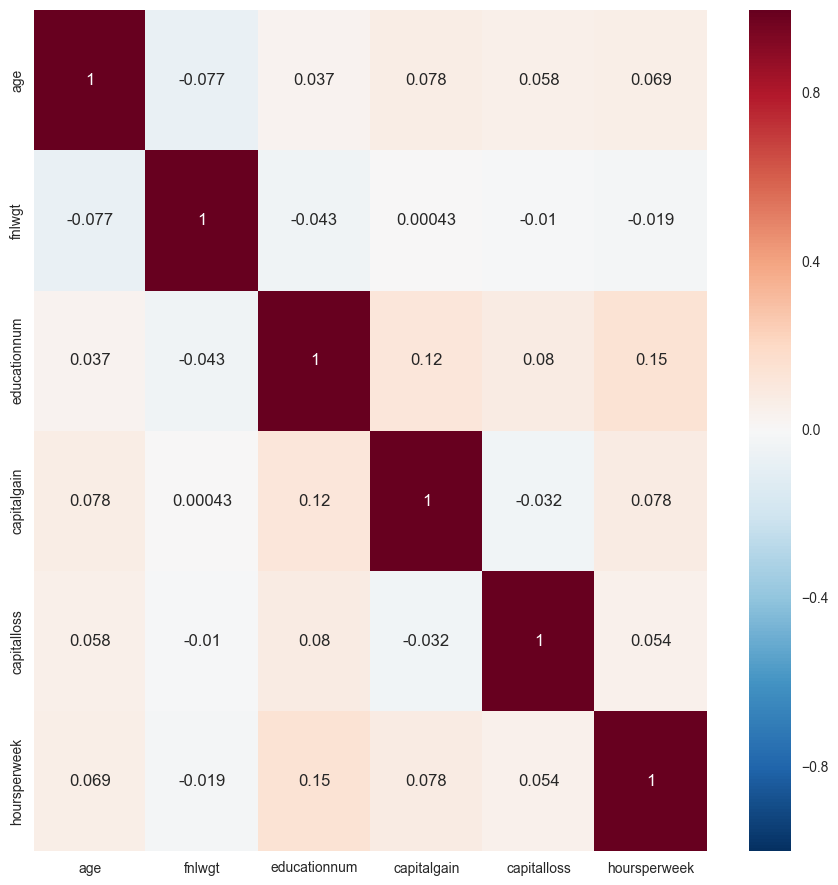

In [280]:
# plot the correlation matrix using seaborn
f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(censusdata.corr(), annot=True)

f.tight_layout()

plt.show()

Interestingly, there does not seem to be high correlations among the continous variables.  One would think that hours per week or capital gain would be correlated to, say, number of education years, but at this point, correlations are not seemingly high.



#### D. Visualize the most interesting attributes – interpret the implications of each visualization

After investigating mutliple attributes and the relationships among those attributes, there are a few that stood out to us.  Below one can see that for both males and females, the majority of that segment fall in the <=$50K group.  

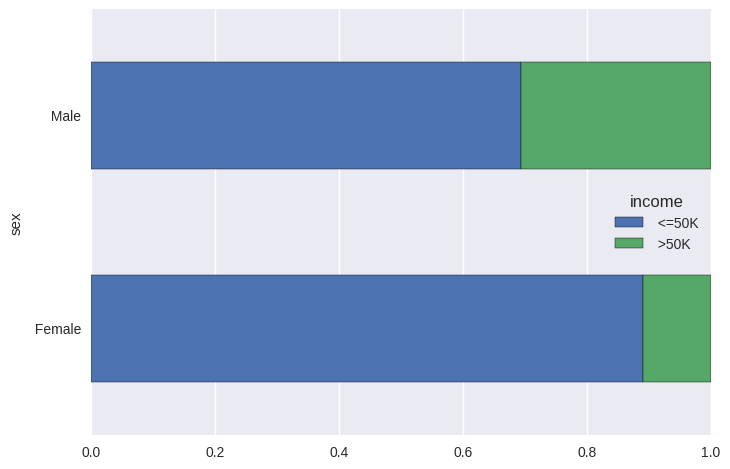

In [3]:
# i. >50 or not = "income" 

sexincome = pd.crosstab(censusdata['sex'],censusdata['income']).apply(lambda r: r/r.sum(), axis=1)
sexincome.plot(kind='barh', stacked=True)
plt.show()

It would be a mistake to say that more men earn >$50K, as the graphs below do not compare the number of females to males. So we checked to see the makeup of those demographics...

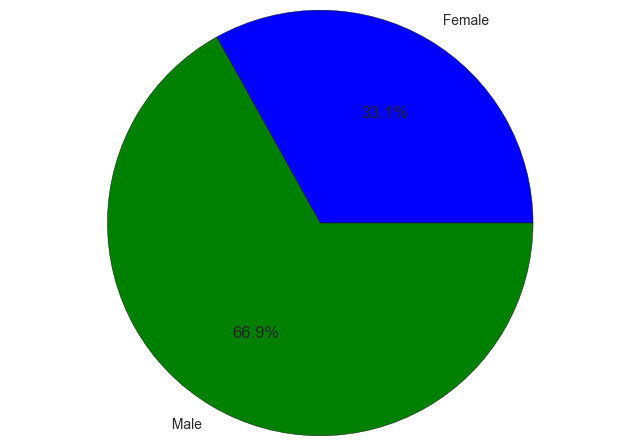

In [291]:
# xi. sex

# Create a series with sex counts
sexcount = censusdata.groupby(['sex']).sex.count()

#Convert the series to dataframe
sexcountdataframe = pd.DataFrame({'sex':sexcount.index, 'count':sexcount.values})


plt.pie(sexcountdataframe['count'], labels=sexcountdataframe['sex'],
        autopct='%1.1f%%')

plt.axis('equal')

plt.show()

With only 33.1% of this data subset being female, it is possible that a more equal distribution would have given different results for the income groupings discussed prior.  Or, it could indicate non-sampling error!

Next we broke out the occupation groups, out of sheer interest.  While pie charts are not always the favorite way to display data, we wanted to attempt creating a pie chart.  Visually, there is not one occupation that seems to dominate, but there are certainly less-represented occupations.

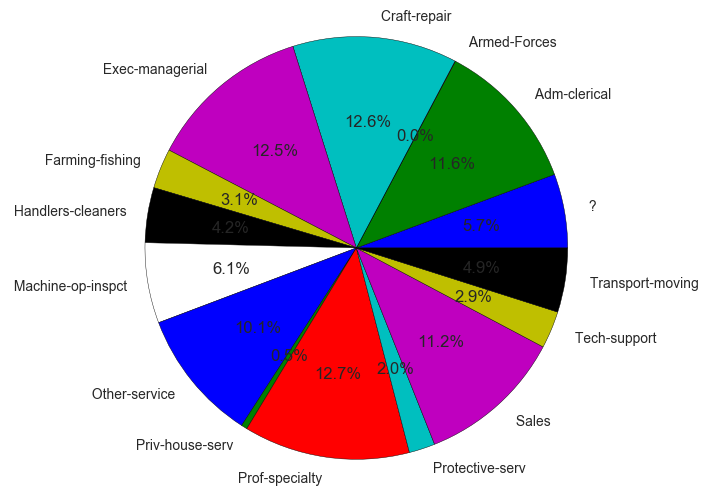

In [288]:
# viii. occupation

# Create a series with occupation counts
occupationcount = censusdata.groupby(['occupation']).occupation.count()

#Convert the series to dataframe
occupationcountdataframe = pd.DataFrame({'occupation':occupationcount.index, 'count':occupationcount.values})


plt.pie(occupationcountdataframe['count'], labels=occupationcountdataframe['occupation'],
        autopct='%1.1f%%')

plt.axis('equal')

plt.show()


When looking at race, the following chart is startling.  According to a grouping by race, whites are heavily represented.  This certainly would need further research to determine why such a weighted representation.  Perhaps this supports claims of the non-sampling error inherent in the US Census.

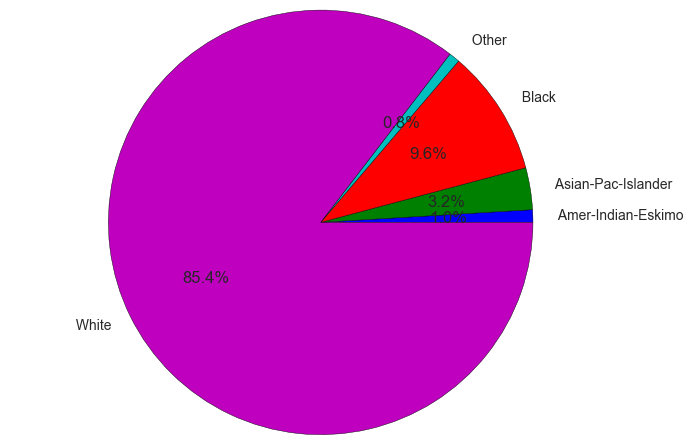

In [290]:
# x. race

# Create a series with race counts
racecount = censusdata.groupby(['race']).race.count()

#Convert the series to dataframe
racecountdataframe = pd.DataFrame({'race':racecount.index, 'count':racecount.values})


plt.pie(racecountdataframe['count'], labels=racecountdataframe['race'],
        autopct='%1.1f%%')

plt.axis('equal')

plt.show()

#### E. Visualize relationship between attributes 

**Age and Income**

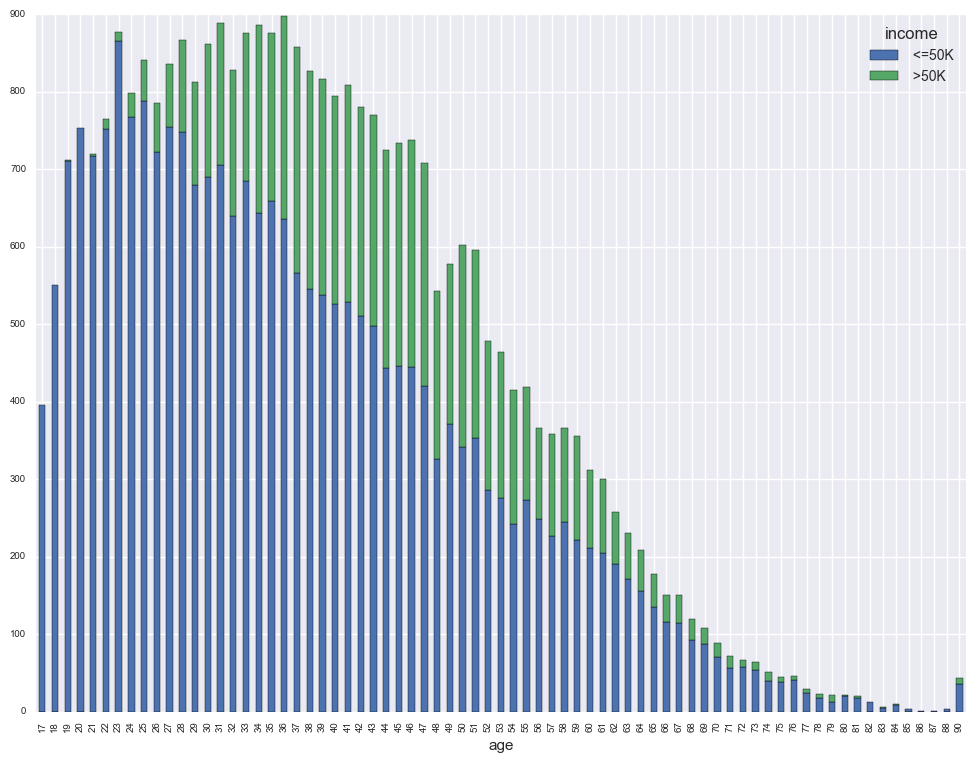

In [296]:
*********************


# i. age/income

ageincome = pd.crosstab(censusdata['age'],censusdata['income'])
ageincome.plot(kind='bar', stacked=True, figsize=(12,9), fontsize=7)
plt.show()

The data contains people from 17 through 90 years old. As expected, young people (17 to 21) make less than 50k/year. The older the worker, the more chance they make more than 50k/year. However, as expected, from a certain age, in the early 50s, the frequency of people that make more than 50k dramatically drops off.  Once one reaches around 80 years of age, that portion is even smaller.  

**Hours Per Week and Income**

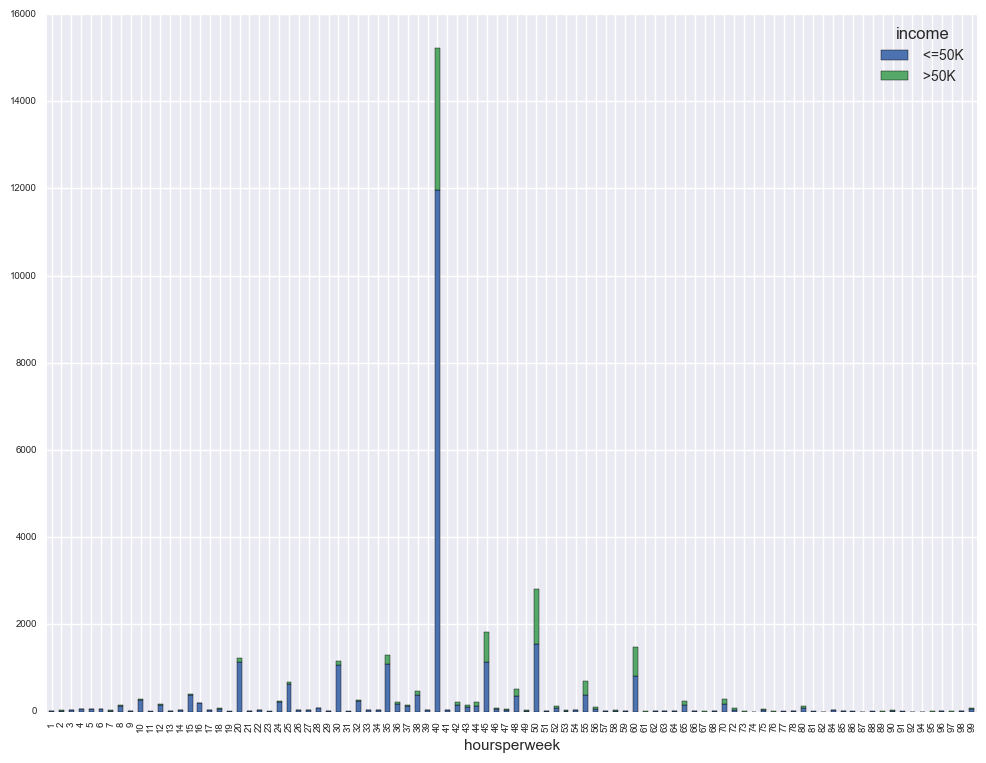

In [297]:

*********************
# ii. hoursperweek/income

hoursperweekincome = pd.crosstab(censusdata['hoursperweek'],censusdata['income'])
hoursperweekincome.plot(kind='bar', stacked=True, figsize=(12,9), fontsize=7)
plt.show()

From the distribution of the hoursperweek data, we can immediately see that the data may have some issues. First, we would expect the data to have more a normal distribution shape. However, we can see that this is not the case, and the number of people that work 40 hours per week is significantly greater than the other groups. We can also see that there are a few more groups of people (for example – 20, 45 and 50 hours), that have more people than the others. In other words, in the real world, we would expect that if for example so many of the people work 40 hours per week, then the number of people around it (i.e. 38, 39, 41, 42 etc.) would be material as well, but this is not the case. The reason for that can be the method of collecting the data. So, for example, if many of the people work in a fixed contract of 40 hours per week, then the real hours they work are not recorded, as there’s no point to record it.   
Another problem we identified is that we expect the hours per week to be in a reasonable range of between 0 to approximately 60 hours per week. Again, we have some observations with 98 or 99 hours per week, a totally unreasonable figure.

**Education and Income, and Number of Education Years and Income**


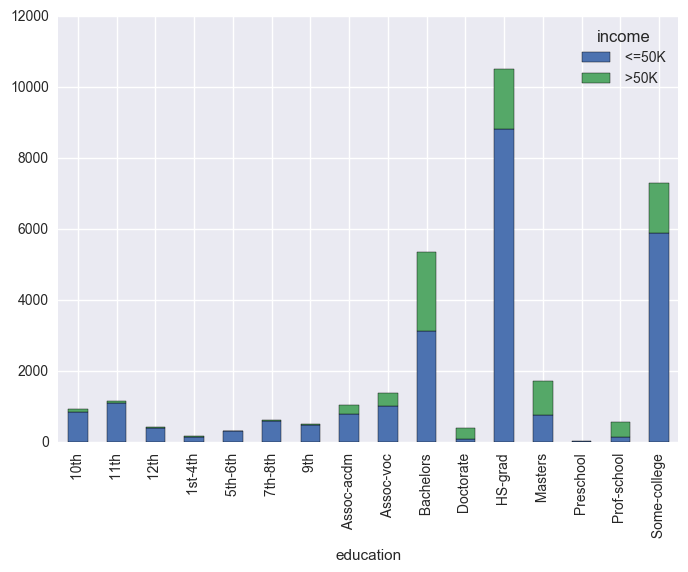

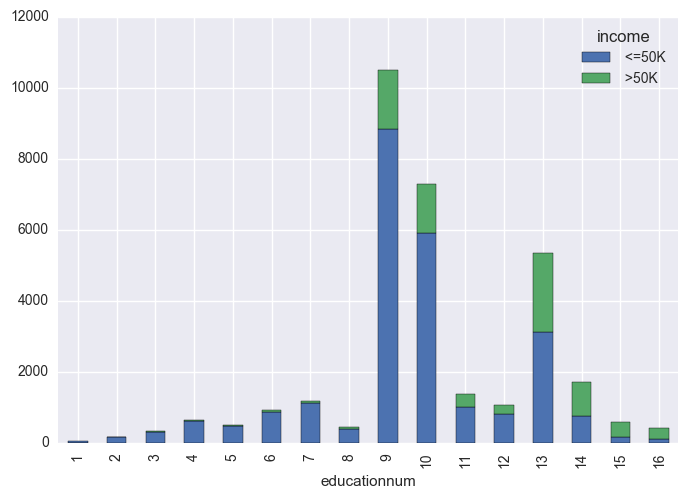

In [298]:
*********************

# iii. education/income and educationnum/income

educationincome = pd.crosstab(censusdata['education'],censusdata['income'])
educationincome.plot(kind='bar', stacked=True)
plt.show()

educationnumincome = pd.crosstab(censusdata['educationnum'],censusdata['income'])
educationnumincome.plot(kind='bar', stacked=True)
plt.show()

The above two charts look at education as it relates to income. 
The first chart shows the number of people (Y axis) for each education level (X axis).
For each education level (for example - completed 11th grade, or obtained a masters degree), each column is divided into the number of people who earn less or equal to 50K (blue), and the number who earn more than 50k. As can be expected, the number of people in each column is lowest for lowest level of education (preschool, 1-4th grades) and, on the other side, the more advanced the degree is (doctorate), the greater the better chance the worker earns above 50k/year. Also, the latter group (higher education level) have higher (aggregated) earning potential as the larger group of all. The second chart is divided into years of education for every group of people, and each column is, again, divided to the number of people who earn less or equal to 50K (blue), and the number who earn more than 50K (green). From the chart it looks like people with 13 years of education have amuch better chance to make more than 50k/year than people with 11 or 12 years of education. The reason for that may come from the fact that additional 3-4 years of education on top of the basic 9-10 can bring a person to another level and make them gain a profession, while 1-2 years on top of the basic education is just a “boost” or a marginal effect for the basic education, but not a fully gained profession.

**Native Country and Income**

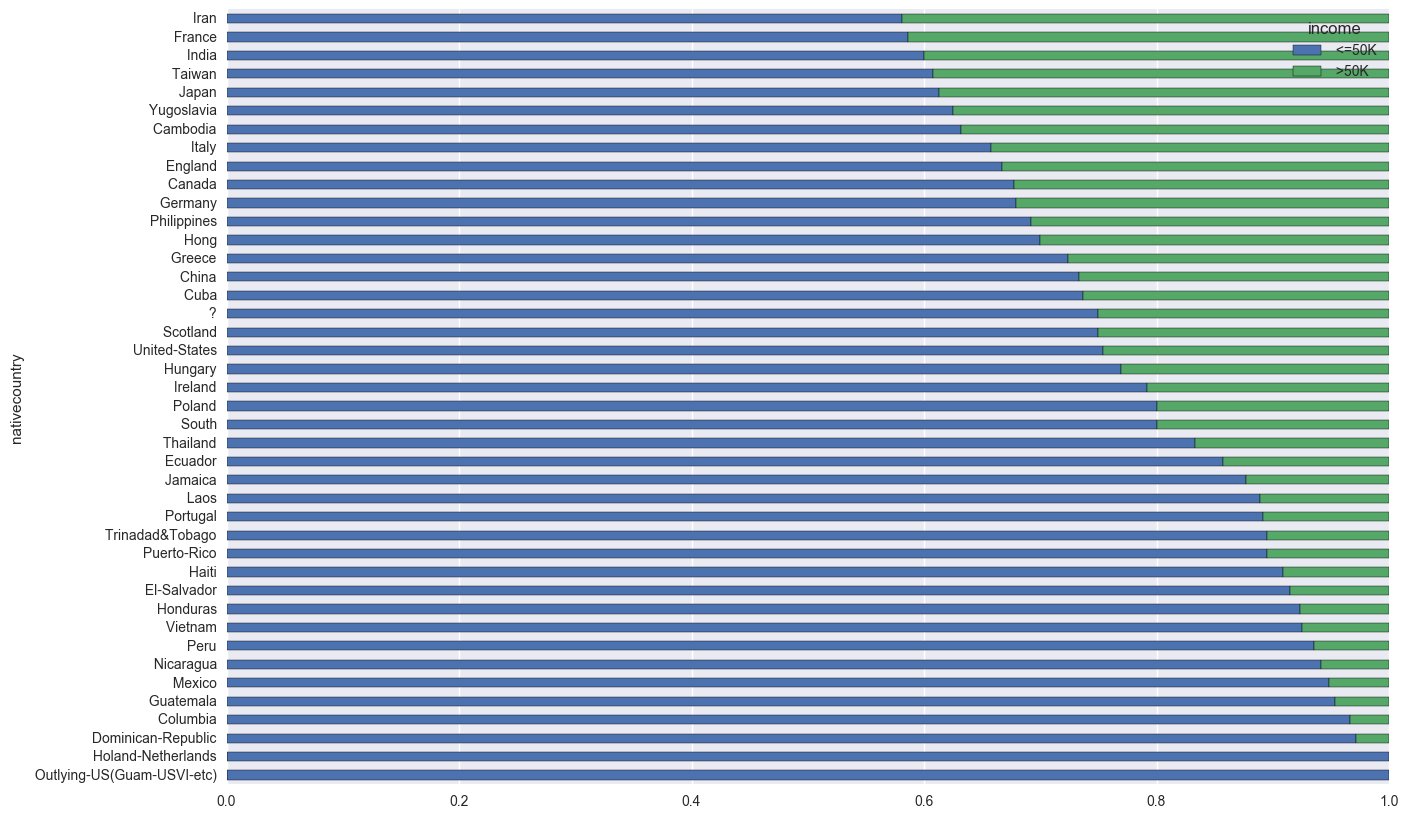

In [300]:
*********************


# v. nativecountry/income

nativecountryincome = pd.crosstab(censusdata['nativecountry'],censusdata['income']).apply(lambda r: r/r.sum(), axis=1)
nativecountryincome = nativecountryincome.sort_values(' <=50K', ascending=False)
nativecountryincome.plot(kind='barh', stacked=True, fontsize=10, figsize=[15,10])
plt.show()

While this chart give a useful information about the origin of the people and how many of them make more than 50k/year, we need to remember that 89% of the people origin’s in the dataset are from united states. To make this point clearer, for example, the first group, Iran, contains only 43 individuals. Nevertheless, it is still interesting to see that USA is approximately in the middle. Hence, we cannot conclude that immigrant in general make more, or less, than natives.

**Occupation and Income**

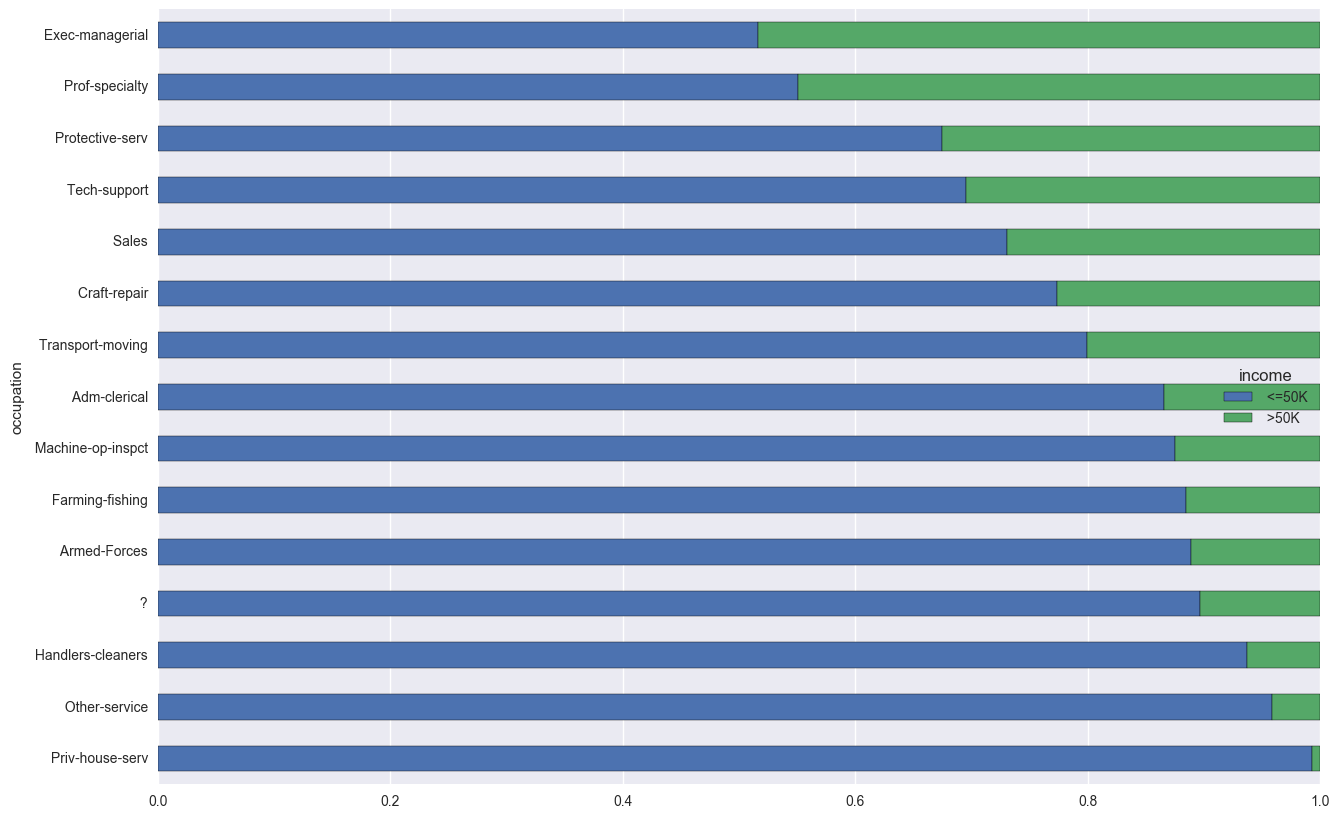

In [301]:
*********************


# vi. occupation/income

occupationincome = pd.crosstab(censusdata['occupation'],censusdata['income']).apply(lambda r: r/r.sum(), axis=1)
occupationincome = occupationincome.sort_values(' <=50K', ascending=False)
occupationincome.plot(kind='barh', stacked=True, fontsize=10, figsize=[15,10])
plt.show()

The full definition of each occupation as well as the reason to use these occupation groups are beyond the scope of this project. Nevertheless, from the information we do have, we can see that the frequency of people that make more than 50k/year is greater in certain groups compared to others. It is not surprising that executive management is at the top, and that the professional specialty in also ranked high (second group). On the other hand, we can see that classic blue-collar occupations, like “handlers-cleaners”, “Private house services” and “Farming-Fishing” are at the bottom of the list.

**Race, Number of Education Years, and Income**

Finally, we reviewed the races collected, plotted in a violin plot against the years of education achieved.  Here we looked to see if there were relationships between a race and the number of education years, for each income group. For the "other" race group, number of education years did not necessarily translate into higher income.  It seems that the most frequent number of education years achived is less than 12 across all races, meaning that achieving a high school diploma or better is still a challenge for all races.  Receiving more than a HS diploma seems to make the biggest difference for "Asian-Pac-Islander", but the significant peaks also appear for whites.  Given that over 80% of the observations were white, this charts comes with a grain or two of salt.

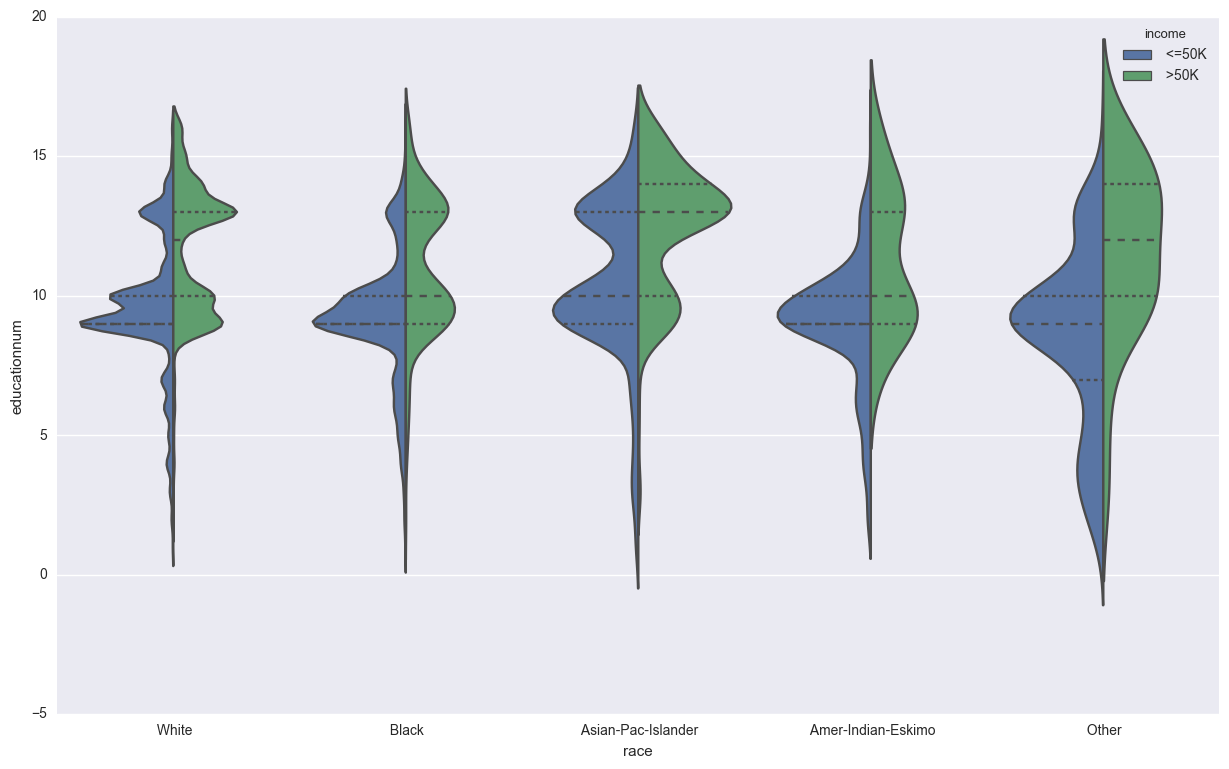

In [303]:
# **WAS NOT INCLUDED IN OUR INITIAL PLAN BUT I THOUGHT WOULD BE INTERESTING***
# race/educationnum/income

f, ax = plt.subplots(figsize=(15, 9))

sns.violinplot(x="race", y="educationnum", hue="income", data=censusdata, split=True, inner="quart")

plt.show()

#### Conclusion

We still have a long way to go before we would be able to classify the data with a model into the two income groups.  With the analysis we have performed so far, we have defintely found both the advantages and disadvantages of this data set given that it is based on the US Census, and seems to be disproportionately weighted towards whites.  Perhaps race was a difficult category to capture, or the qualifiers used to create this subset unwittingly drew itself even further from the population that the original data set, the US Census.  Certainly, whatever conlusions are drawn from analyzing this data set would be open to criticism.

## References

http://scg.sdsu.edu/dataset-adult_r/

https://www.census.gov/content/dam/Census/newsroom/facts-for-features/2014/cb14-ff08.pdf

http://www.civilrights.org/census/accurate-count/inaccuracies.html

http://www2.nhc.org/media/files/HousingStabilityandChildren_Release_FINAL.pdf